In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\CANVA\Diabetes-Prediction-using-ML-AND-DL-main\diabetes.csv')

In [3]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## EXPLORATORY DATA ANALYSIS

In [4]:
df.shape

(768, 9)

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [8]:
df[['Glucose','BloodPressure']].describe()

,Glucose,BloodPressure
count,768.000000,768.000000
mean,120.894531,69.105469
std,31.972618,19.355807
min,0.000000,0.000000
25%,99.000000,62.000000
50%,117.000000,72.000000
75%,140.250000,80.000000
max,199.000000,122.000000


In [9]:
df.dtypes[df.dtypes=='float']

BMI                         float64
DiabetesPedigreeFunction    float64
dtype: object

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
df['Insulin']

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64

In [12]:
df['Insulin'].unique

<bound method Series.unique of 0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64>

In [13]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

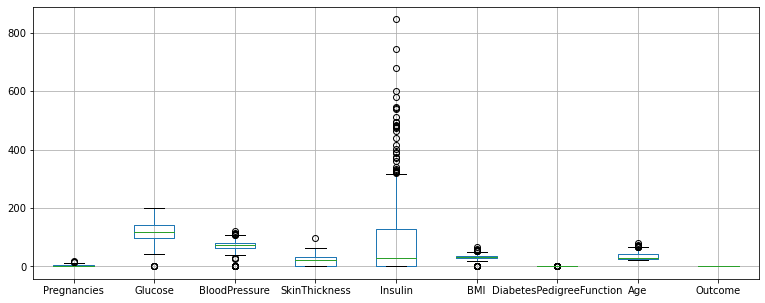

In [14]:
df.boxplot(figsize=(13,5))
plt.show()

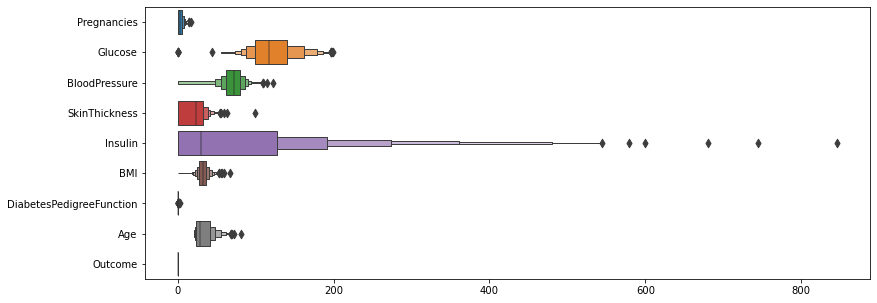

In [15]:
plt.figure(figsize=(13,5))
sns.boxenplot(data=df,orient='h')
plt.show()

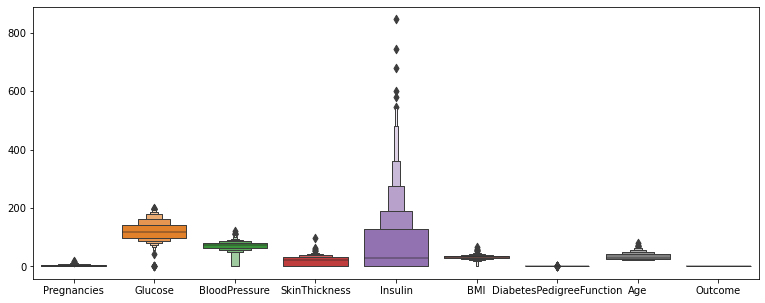

In [16]:
plt.figure(figsize=(13,5))
sns.boxenplot(data=df,orient='v')
plt.show()

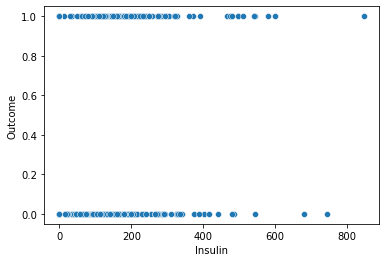

In [17]:
sns.scatterplot(x=df['Insulin'], y=df['Outcome'])
plt.show()

## Replacing 0 with Mean with respective columns

In [18]:
X = df.drop('Outcome', axis=1)

In [19]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [20]:
Y=df['Outcome']

In [21]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [22]:
X.replace(to_replace=0,value=X.mean(), inplace=True)

In [23]:
X.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50
1,1.000000,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31
2,8.000000,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32
3,1.000000,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21
4,3.845052,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33
5,5.000000,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30
6,3.000000,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26
7,10.000000,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29
8,2.000000,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53
9,8.000000,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54


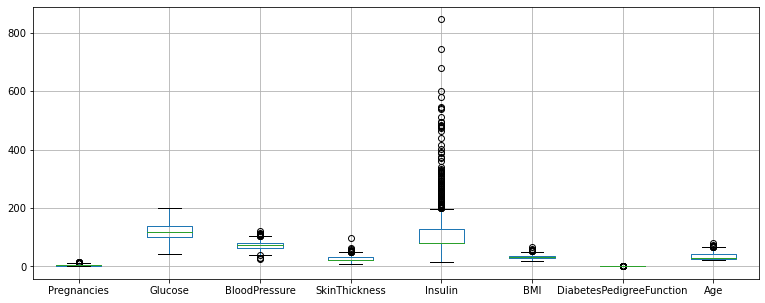

In [24]:
X.boxplot(figsize=(13,5))
plt.show()

## Spliting of data for training and testing

In [25]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [26]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=None)

In [29]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
437,5.0,147.000000,75.0,20.536458,79.799479,29.9,0.434,28
75,1.0,120.894531,48.0,20.000000,79.799479,24.7,0.140,22
223,7.0,142.000000,60.0,33.000000,190.000000,28.8,0.687,61
705,6.0,80.000000,80.0,36.000000,79.799479,39.8,0.177,28
313,3.0,113.000000,50.0,10.000000,85.000000,29.5,0.626,25
...,...,...,...,...,...,...,...,...
597,1.0,89.000000,24.0,19.000000,25.000000,27.8,0.559,21
734,2.0,105.000000,75.0,20.536458,79.799479,23.3,0.560,53
147,2.0,106.000000,64.0,35.000000,119.000000,30.5,1.400,34
404,5.0,168.000000,64.0,20.536458,79.799479,32.9,0.135,41


In [30]:
Y_train

437    0
75     0
223    0
705    0
313    0
      ..
597    0
734    0
147    0
404    1
700    0
Name: Outcome, Length: 576, dtype: int64

## Standard Scaler

In [31]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [32]:
std

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

In [34]:
X_train_std

array([[ 0.18946096,  0.82315188,  0.16928973, ..., -0.38907072,
        -0.12873878, -0.44444668],
       [-1.13852943, -0.04359626, -1.99219845, ..., -1.13678599,
        -0.99061426, -0.94379899],
       [ 0.85345615,  0.65714296, -1.03153703, ..., -0.54724126,
         0.61294318,  2.30199104],
       ...,
       [-0.80653183, -0.53812126, -0.71131656, ..., -0.30279588,
         2.7031378 ,  0.05490564],
       [ 0.18946096,  1.52038934, -0.71131656, ...,  0.04230347,
        -1.00527201,  0.63748333],
       [-0.80653183, -0.00689272,  0.24934485, ...,  0.47367767,
         0.01490713, -0.61089745]])

## Train our Model

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [36]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
lr.fit(X_train_std,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
Y_pred = lr.predict(X_test_std)

In [39]:
Y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [40]:
Y_test

527    0
89     0
704    0
300    1
390    0
      ..
209    1
1      0
121    0
326    1
698    0
Name: Outcome, Length: 192, dtype: int64

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
lr_ac = accuracy_score(Y_pred,Y_test) * 100

In [43]:
lr_ac

78.125

## Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [45]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
Y_pred = dt.predict(X_test_std)

In [48]:
Y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [49]:
Y_test

527    0
89     0
704    0
300    1
390    0
      ..
209    1
1      0
121    0
326    1
698    0
Name: Outcome, Length: 192, dtype: int64

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
dt_ar = accuracy_score(Y_pred, Y_test) *100

In [52]:
dt_ar

67.70833333333334

## Deep Learning

In [53]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(8,8))

In [54]:
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [55]:
mlp.fit(X_train_std,Y_train)

C:\Users\Abhishek kumar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [56]:
Y_pred = mlp.predict(X_test_std)

In [57]:
Y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [58]:
mlp_ac = accuracy_score(Y_pred, Y_test) *100

In [59]:
mlp_ac

77.60416666666666